In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
wine=pd.read_csv('wine.csv')
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5

In [3]:
wine.shape

(1599, 12)

In [4]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [6]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide      density           pH    sulphates      alcohol      quality
count    1599.000000       1599.000000  1599.000000     1599.000000  1599.000000          1599.000000           1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000
mean        8.319637          0.527821     0.270976        2.538806     0.087467            15.874922             46.467792     0.996747     3.311113     0.658149    10.422983     5.636023
std         1.741096          0.179060     0.194801        1.409928     0.047065            10.460157             32.895324     0.001887     0.154386     0.169507     1.065668     0.807569
min         4.600000          0.120000     0.000000        0.900000     0.012000             1.000000              6.000000     0.990070     2.740000     0.330000     8.400000     3.000000
25%         7.100000          0.390000     0.090000        1.900000     0.070000             7.000000             22.000000     0.995600     3.210000     0.550000     9.500000     5.000000
50%         7.900000          0.520000     0.260000        2.200000     0.079000            14.000000             38.000000     0.996750     3.310000     0.620000    10.200000     6.000000
75%         9.200000          0.640000     0.420000        2.600000     0.090000            21.000000             62.000000     0.997835     3.400000     0.730000    11.100000     6.000000
max        15.900000          1.580000     1.000000       15.500000     0.611000            72.000000            289.000000     1.003690     4.010000     2.000000    14.900000     8.000000

In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Univariate Analysis

In [9]:
wine.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5

In [10]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

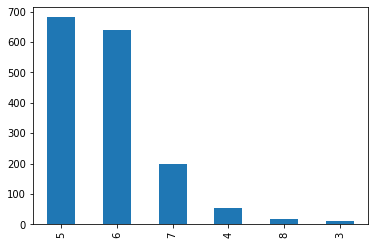

In [11]:
wine.quality.value_counts().plot.bar()

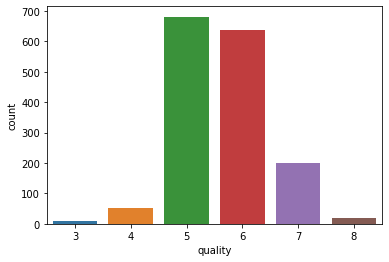

In [13]:
sns.countplot(data=wine, x='quality')

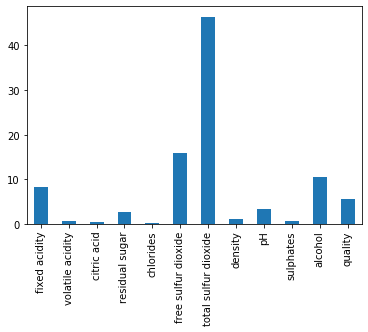

In [12]:
wine.describe().loc['mean',:].plot.bar()

In [14]:
wine.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  sulphates    alcohol
quality                                                                                                                                                              
3             8.360000          0.884500     0.171000        2.635000   0.122500            11.000000             24.900000  0.997464  3.398000   0.570000   9.955000
4             7.779245          0.693962     0.174151        2.694340   0.090679            12.264151             36.245283  0.996542  3.381509   0.596415  10.265094
5             8.167254          0.577041     0.243686        2.528855   0.092736            16.983847             56.513950  0.997104  3.304949   0.620969   9.899706
6             8.347179          0.497484     0.273824        2.477194   0.084956            15.711599             40.869906  0.996615  3.318072   0.675329  10.629519
7             8.872362          0.403920     0.375176        2.720603   0.076588            14.045226             35.020101  0.996104  3.290754   0.741256  11.465913
8             8.566667          0.423333     0.391111        2.577778   0.068444            13.277778             33.444444  0.995212  3.267222   0.767778  12.094444

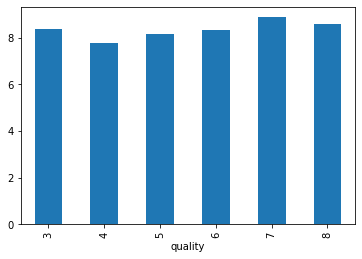

In [15]:
wine.groupby('quality').mean().loc[:,'fixed acidity'].plot.bar()

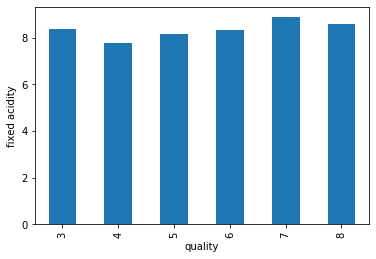

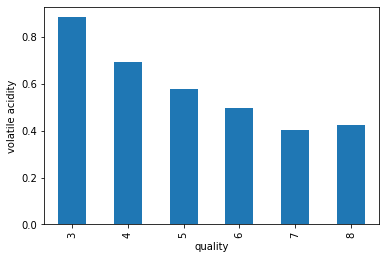

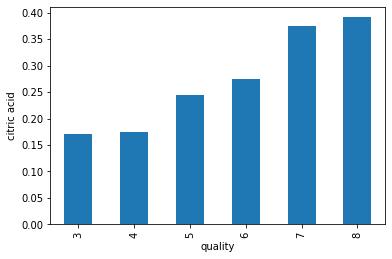

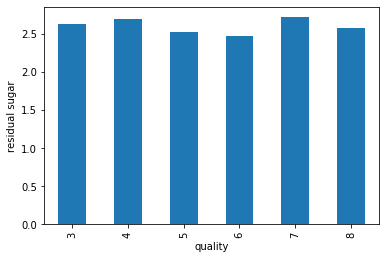

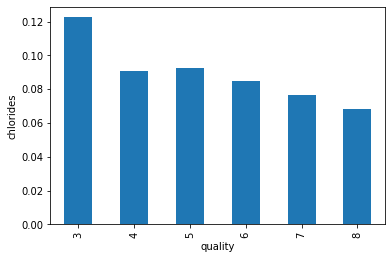

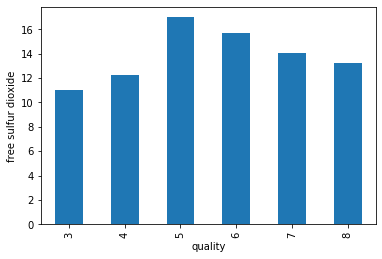

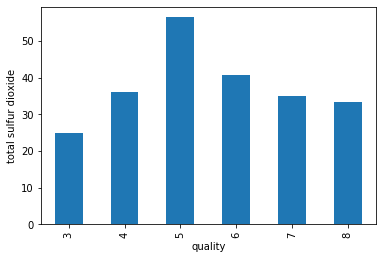

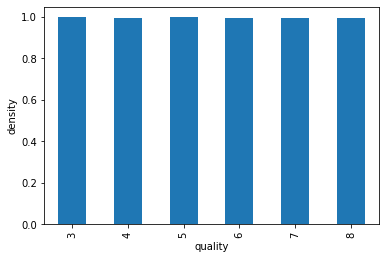

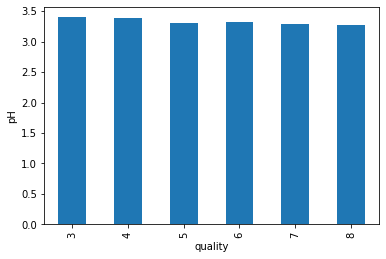

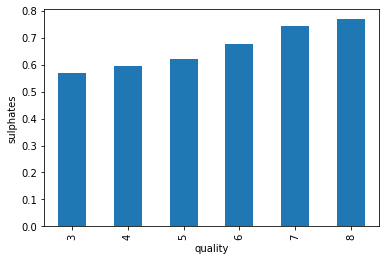

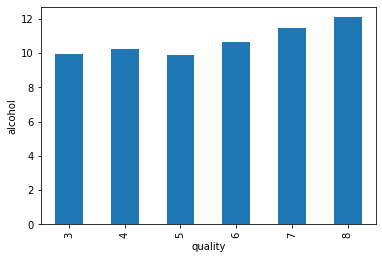

In [18]:
col=wine.groupby('quality').mean().columns.values
for i in col:
    plt.subplots()
    plt.ylabel(i)
    wine.groupby('quality').mean().loc[:,i].plot.bar()

<Figure size 1800x360 with 0 Axes>

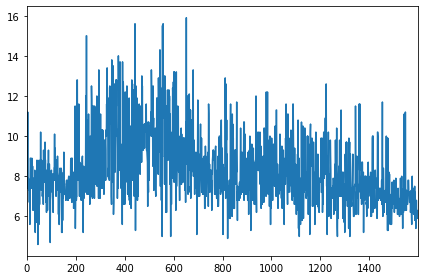

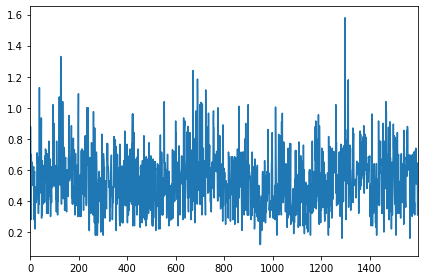

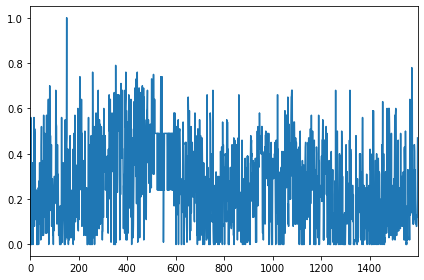

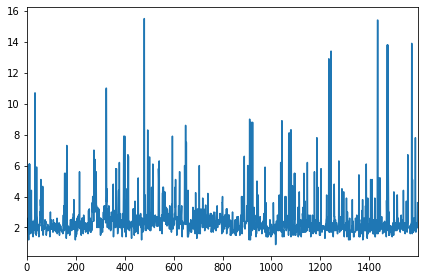

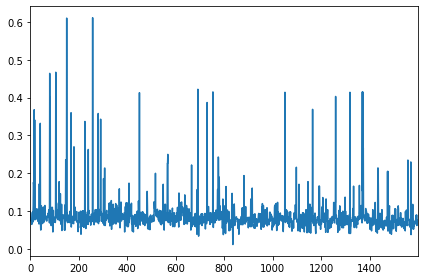

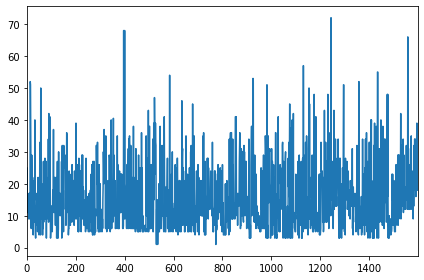

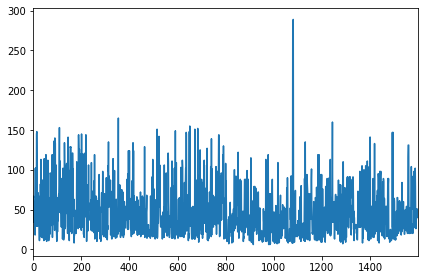

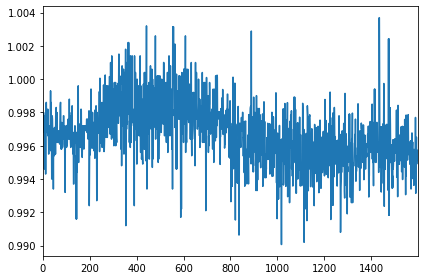

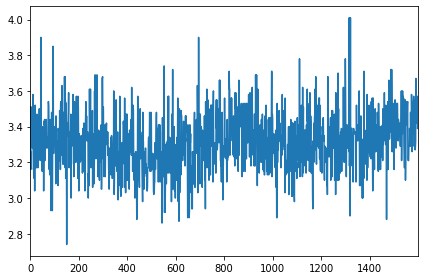

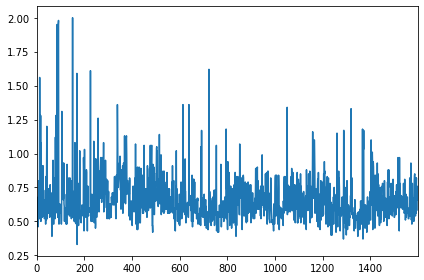

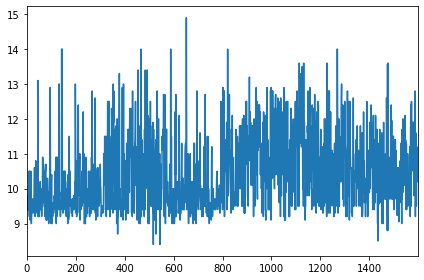

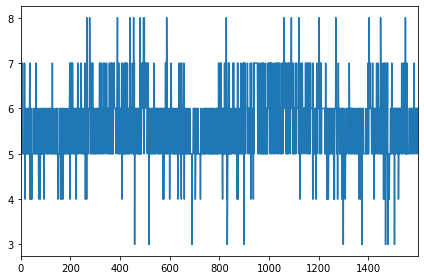

In [21]:
plt.figure(figsize=(25,5))
col=wine.columns.values
for i in col:
    plt.subplots()
    wine[i].plot()
    plt.tight_layout()

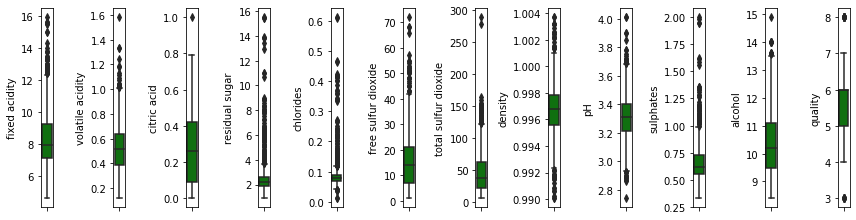

In [23]:
plt.figure(figsize=(12,36))
# col=wine.columns.values
for i in range(len(col)):
    plt.subplot(12,12,i+1)
    sns.boxplot(wine[col[i]], color='green', orient='v')
    plt.tight_layout()

<Figure size 1080x576 with 0 Axes>

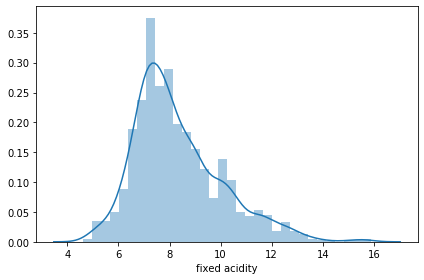

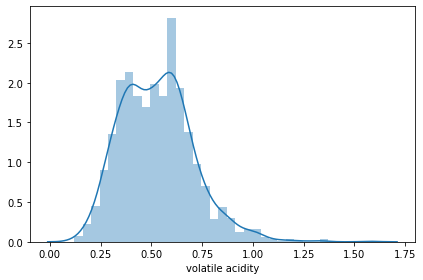

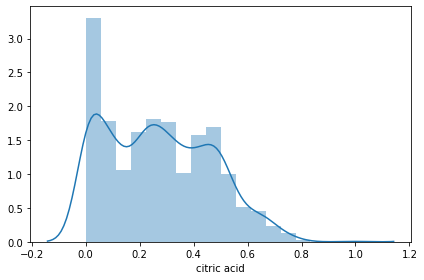

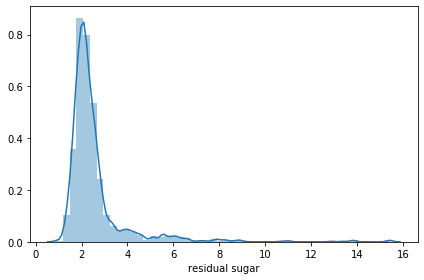

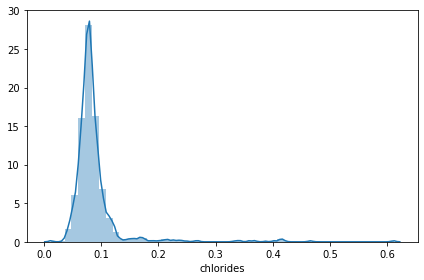

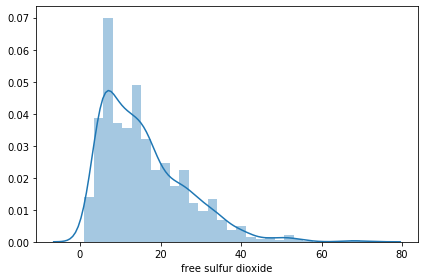

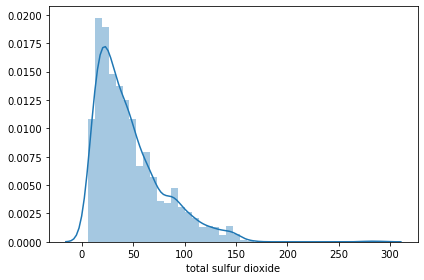

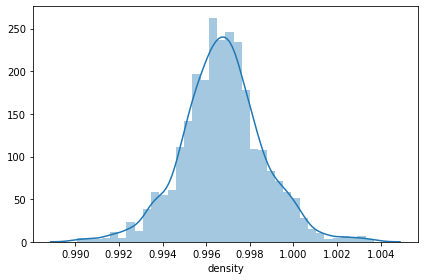

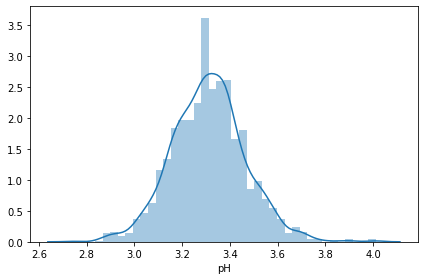

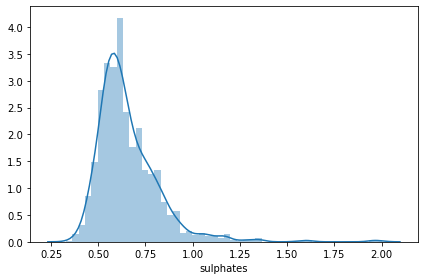

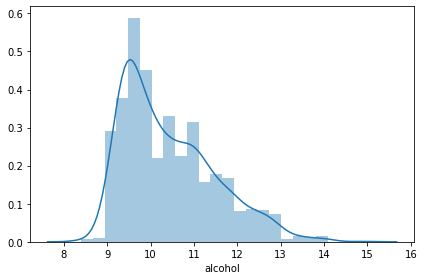

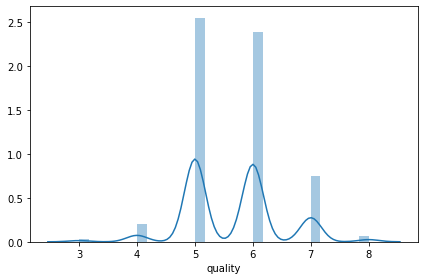

In [24]:
plt.figure(figsize=(15,8))
col=wine.columns.values
for i in col:
    plt.subplots()
    sns.distplot(wine[i])
    plt.tight_layout()

# Bivariate Analysis

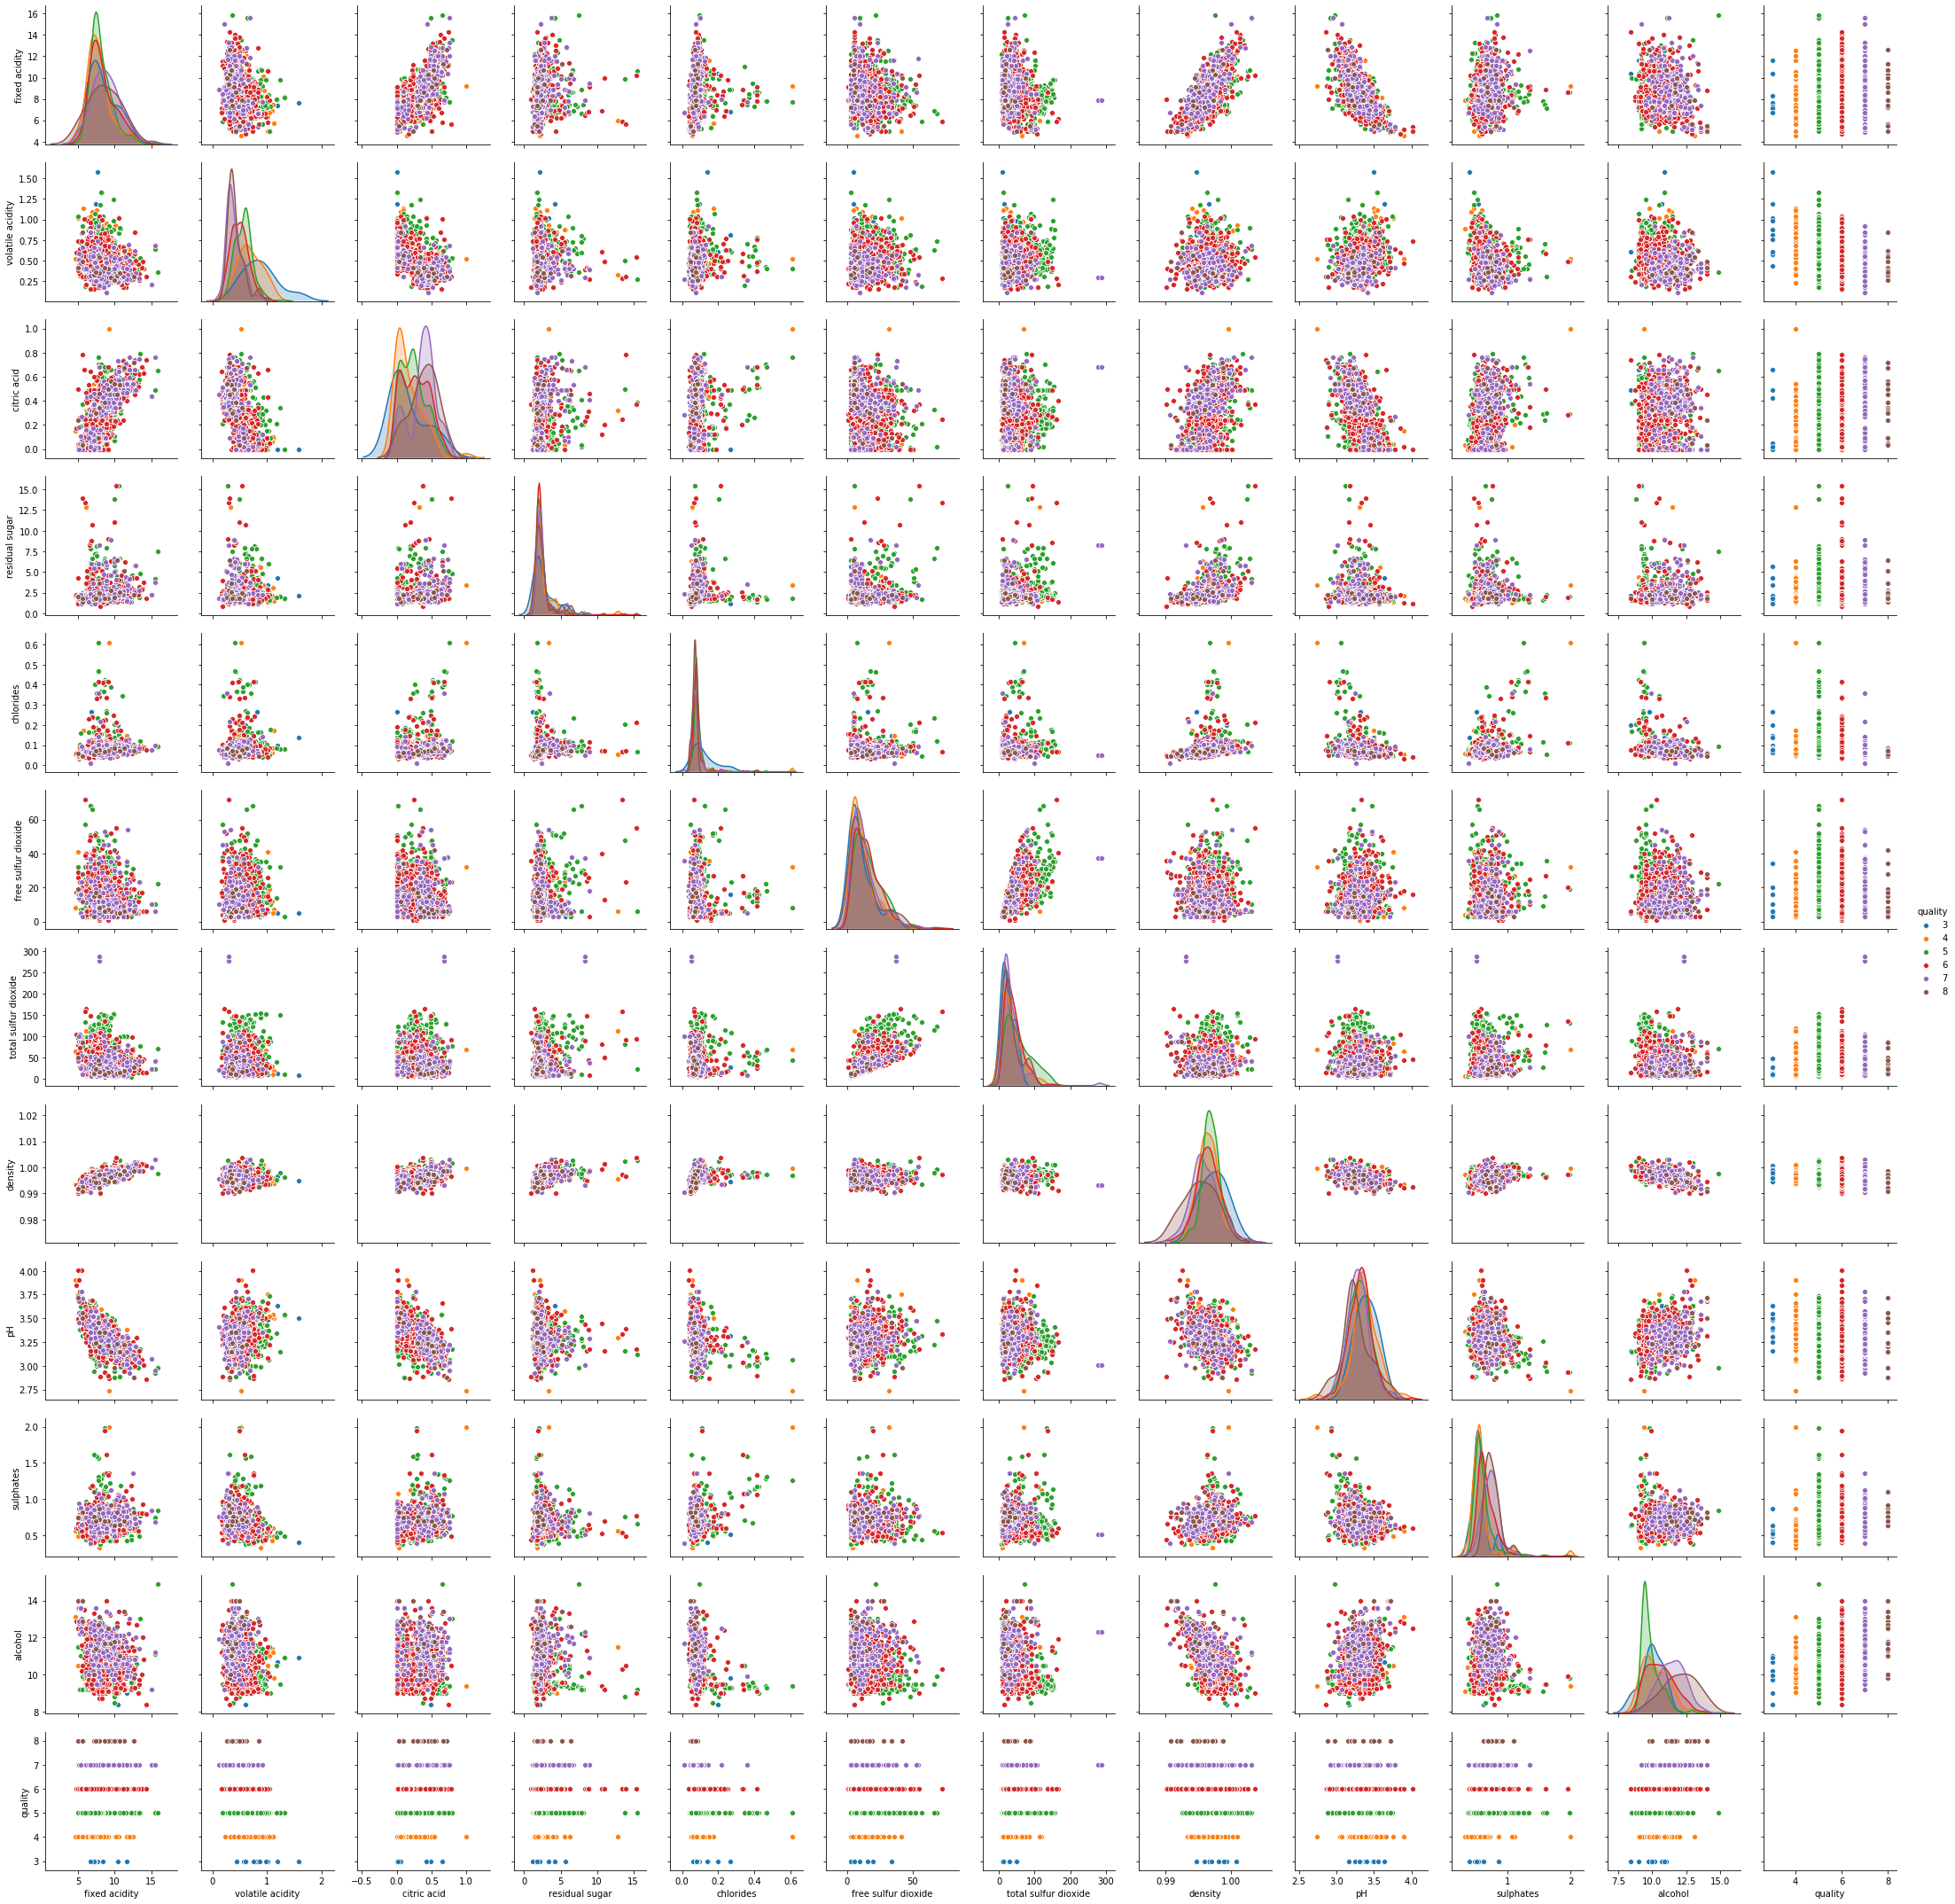

In [28]:
sns.pairplot(wine, hue='quality')

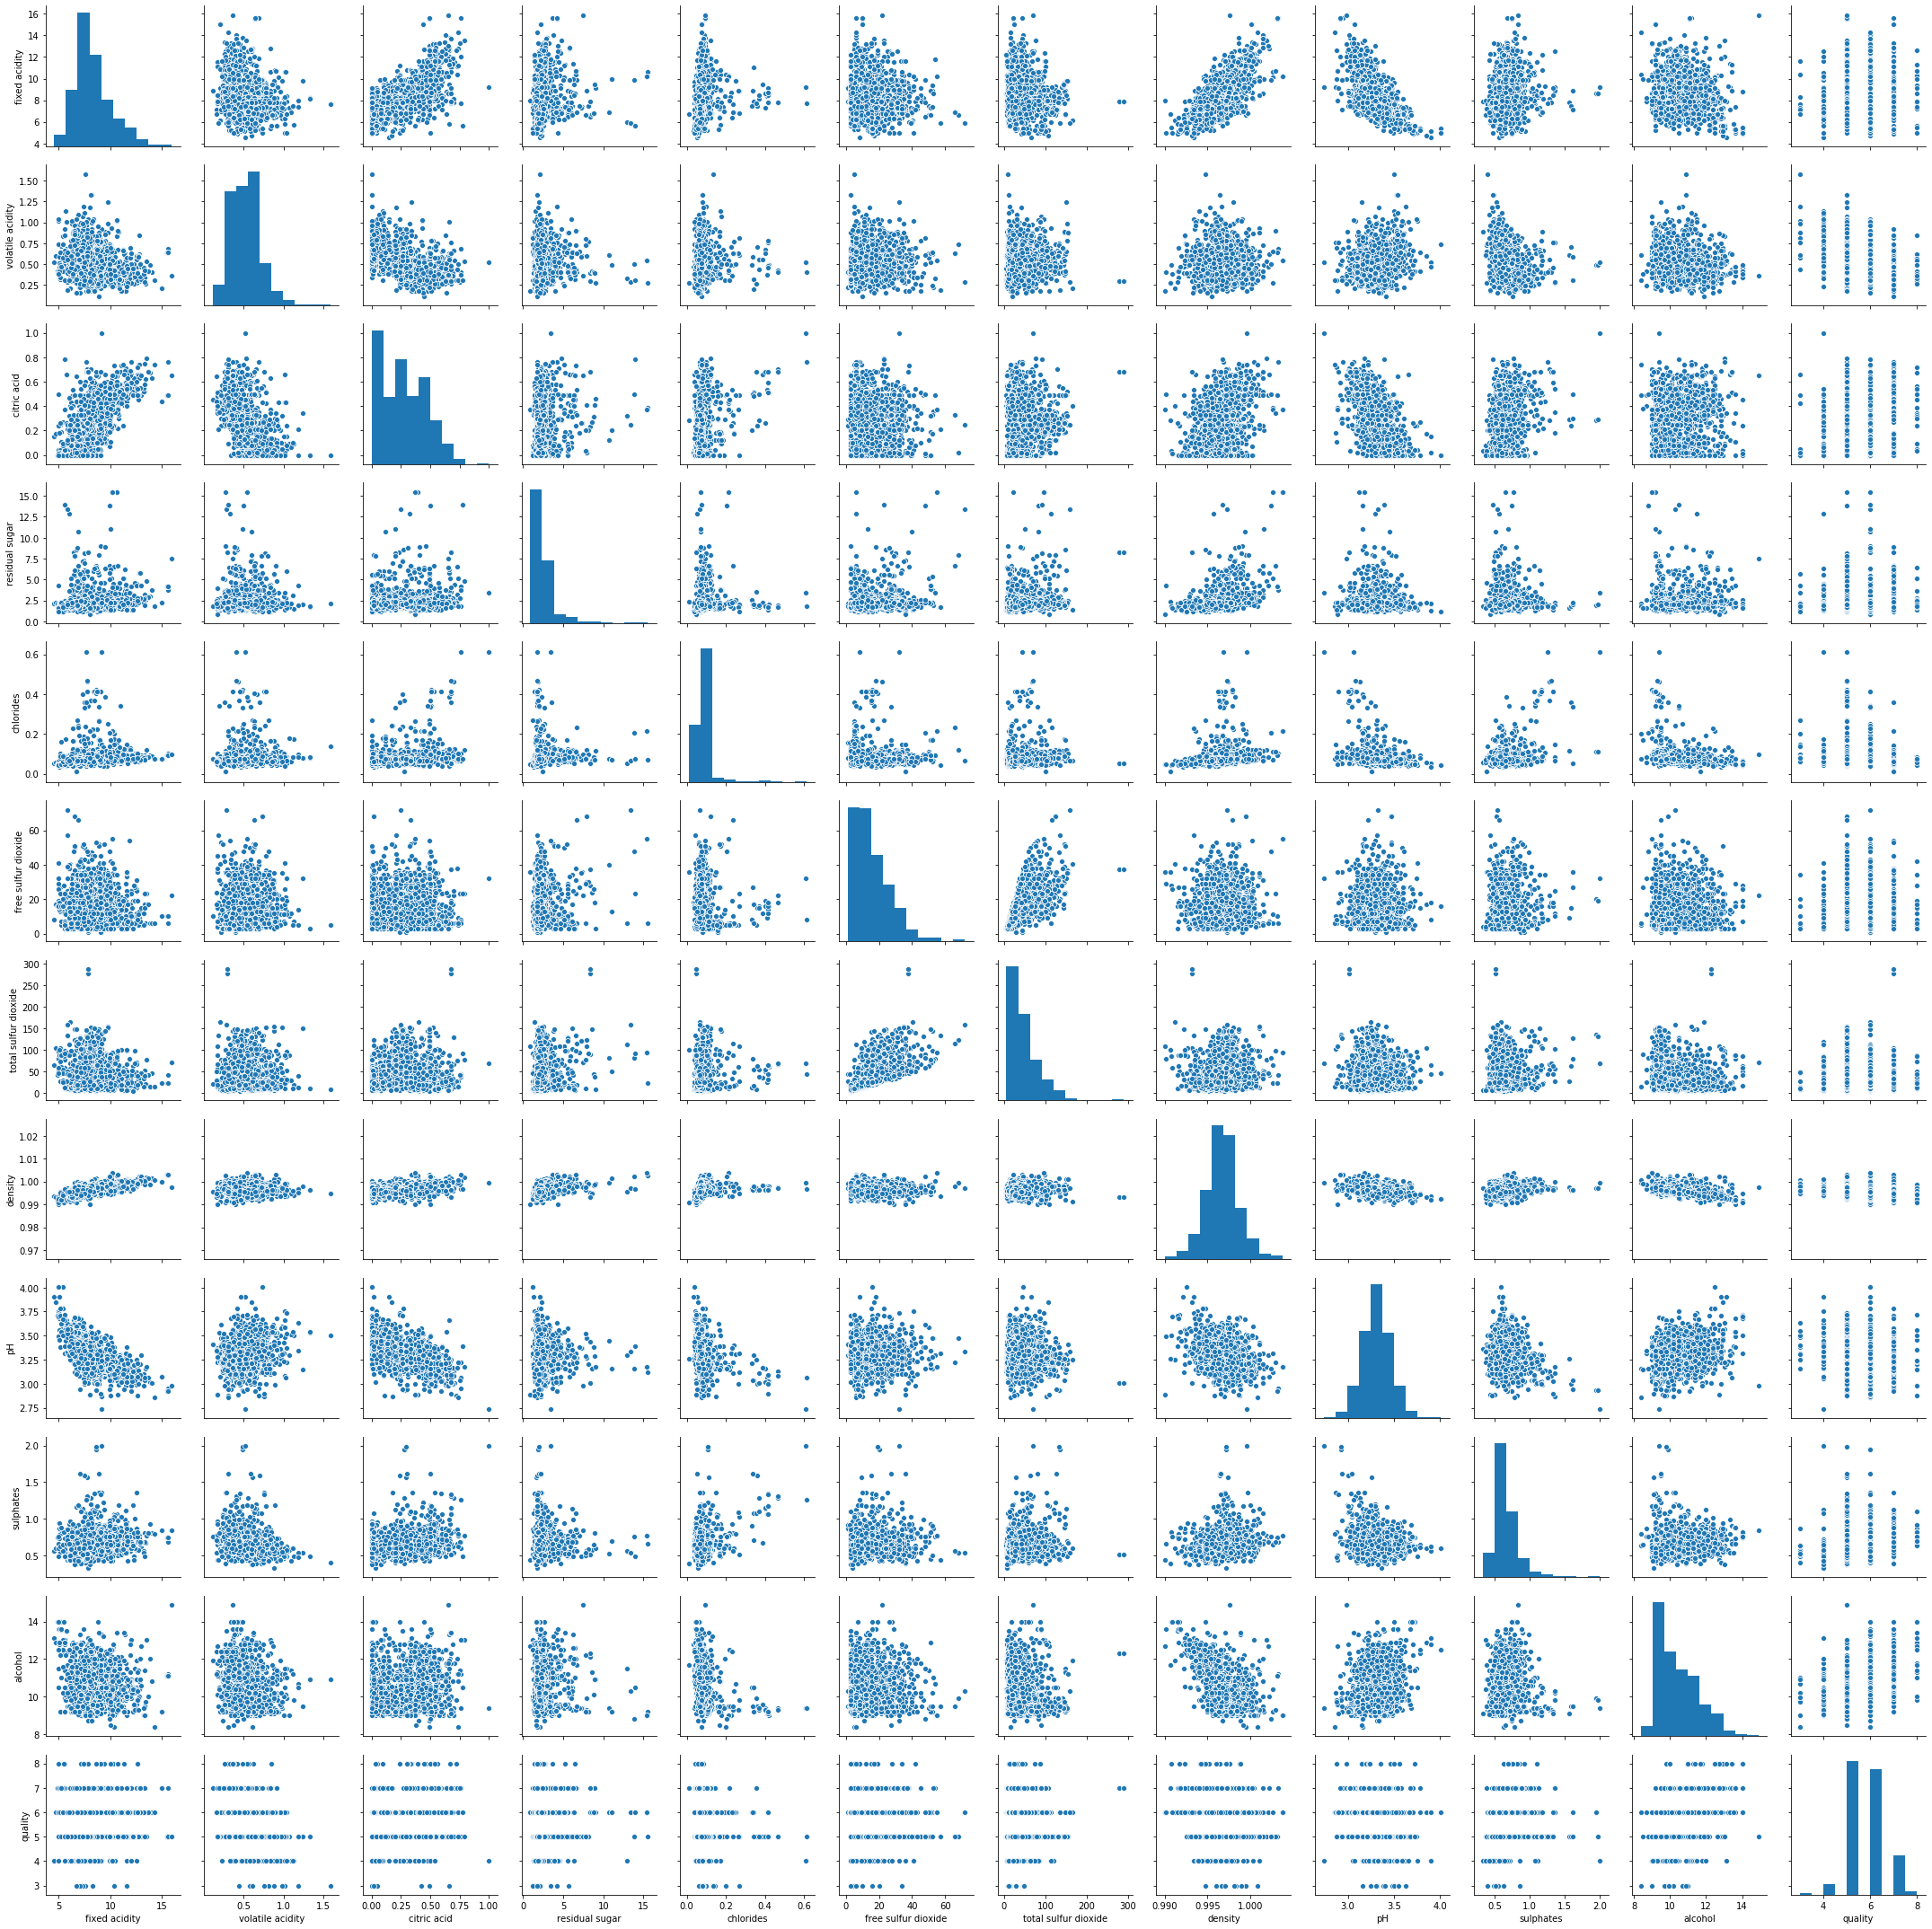

In [29]:
sns.pairplot(wine)

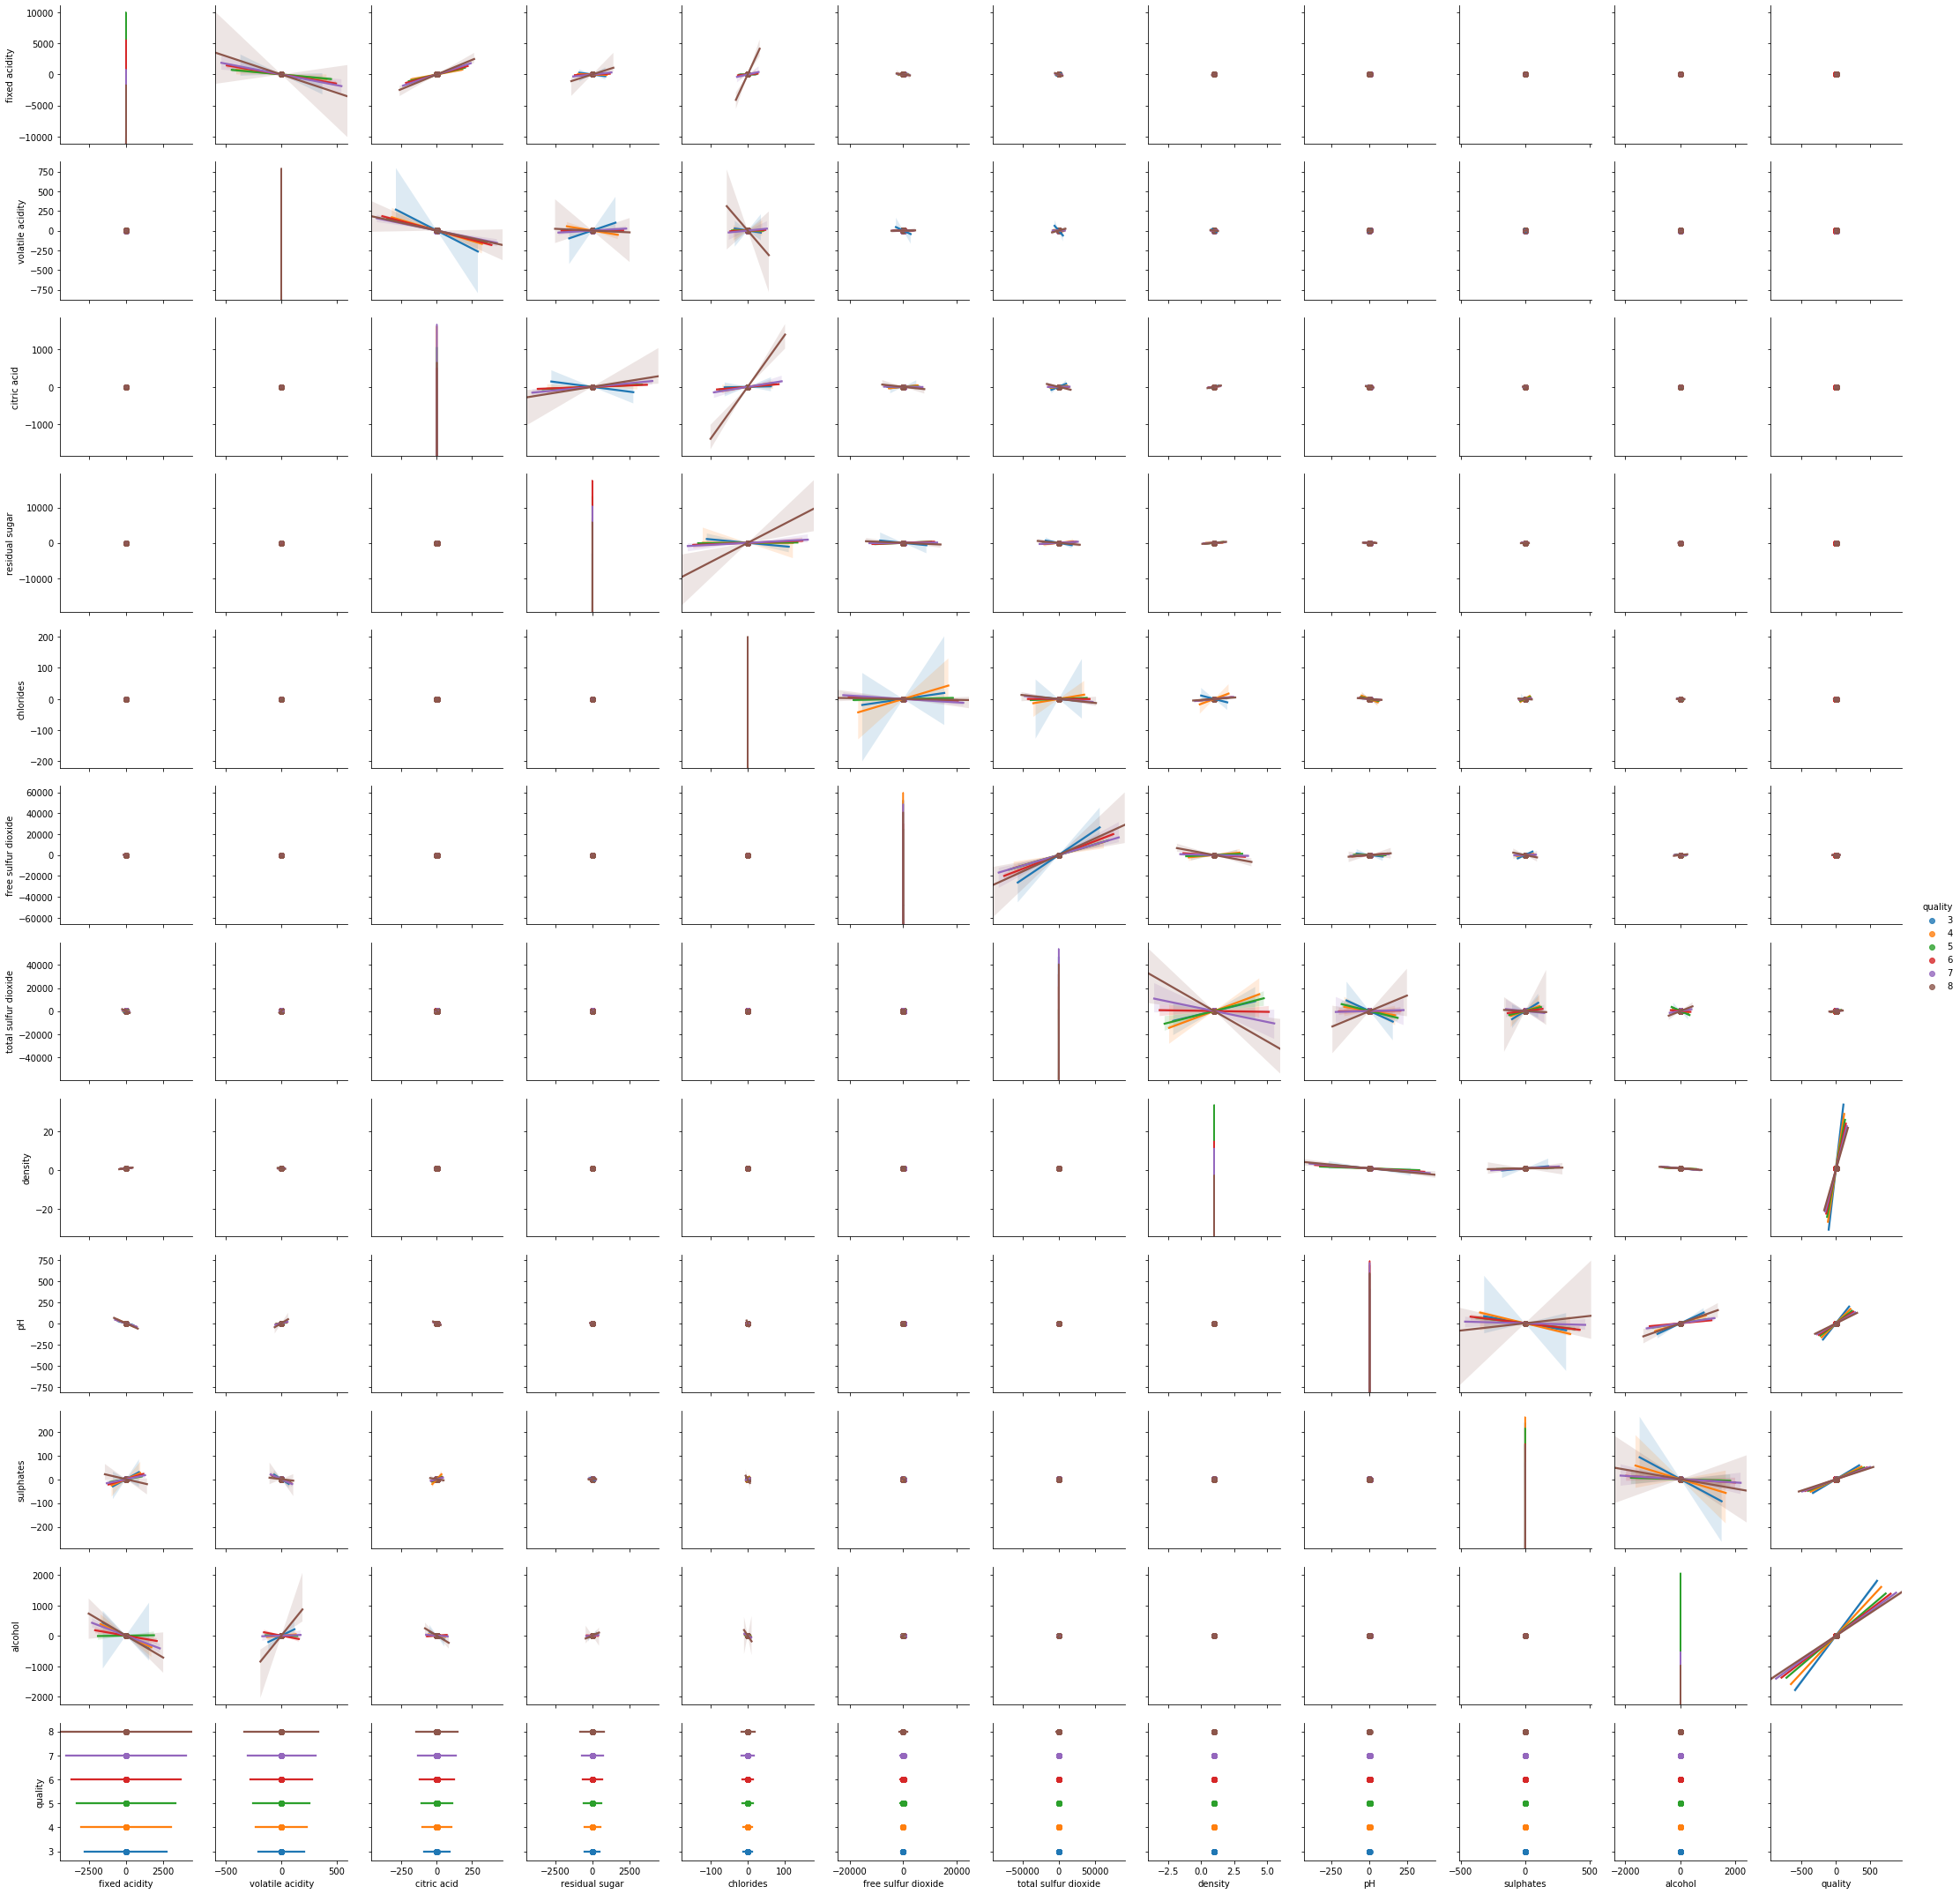

In [30]:
sns.pairplot(wine, kind='reg', hue='quality')

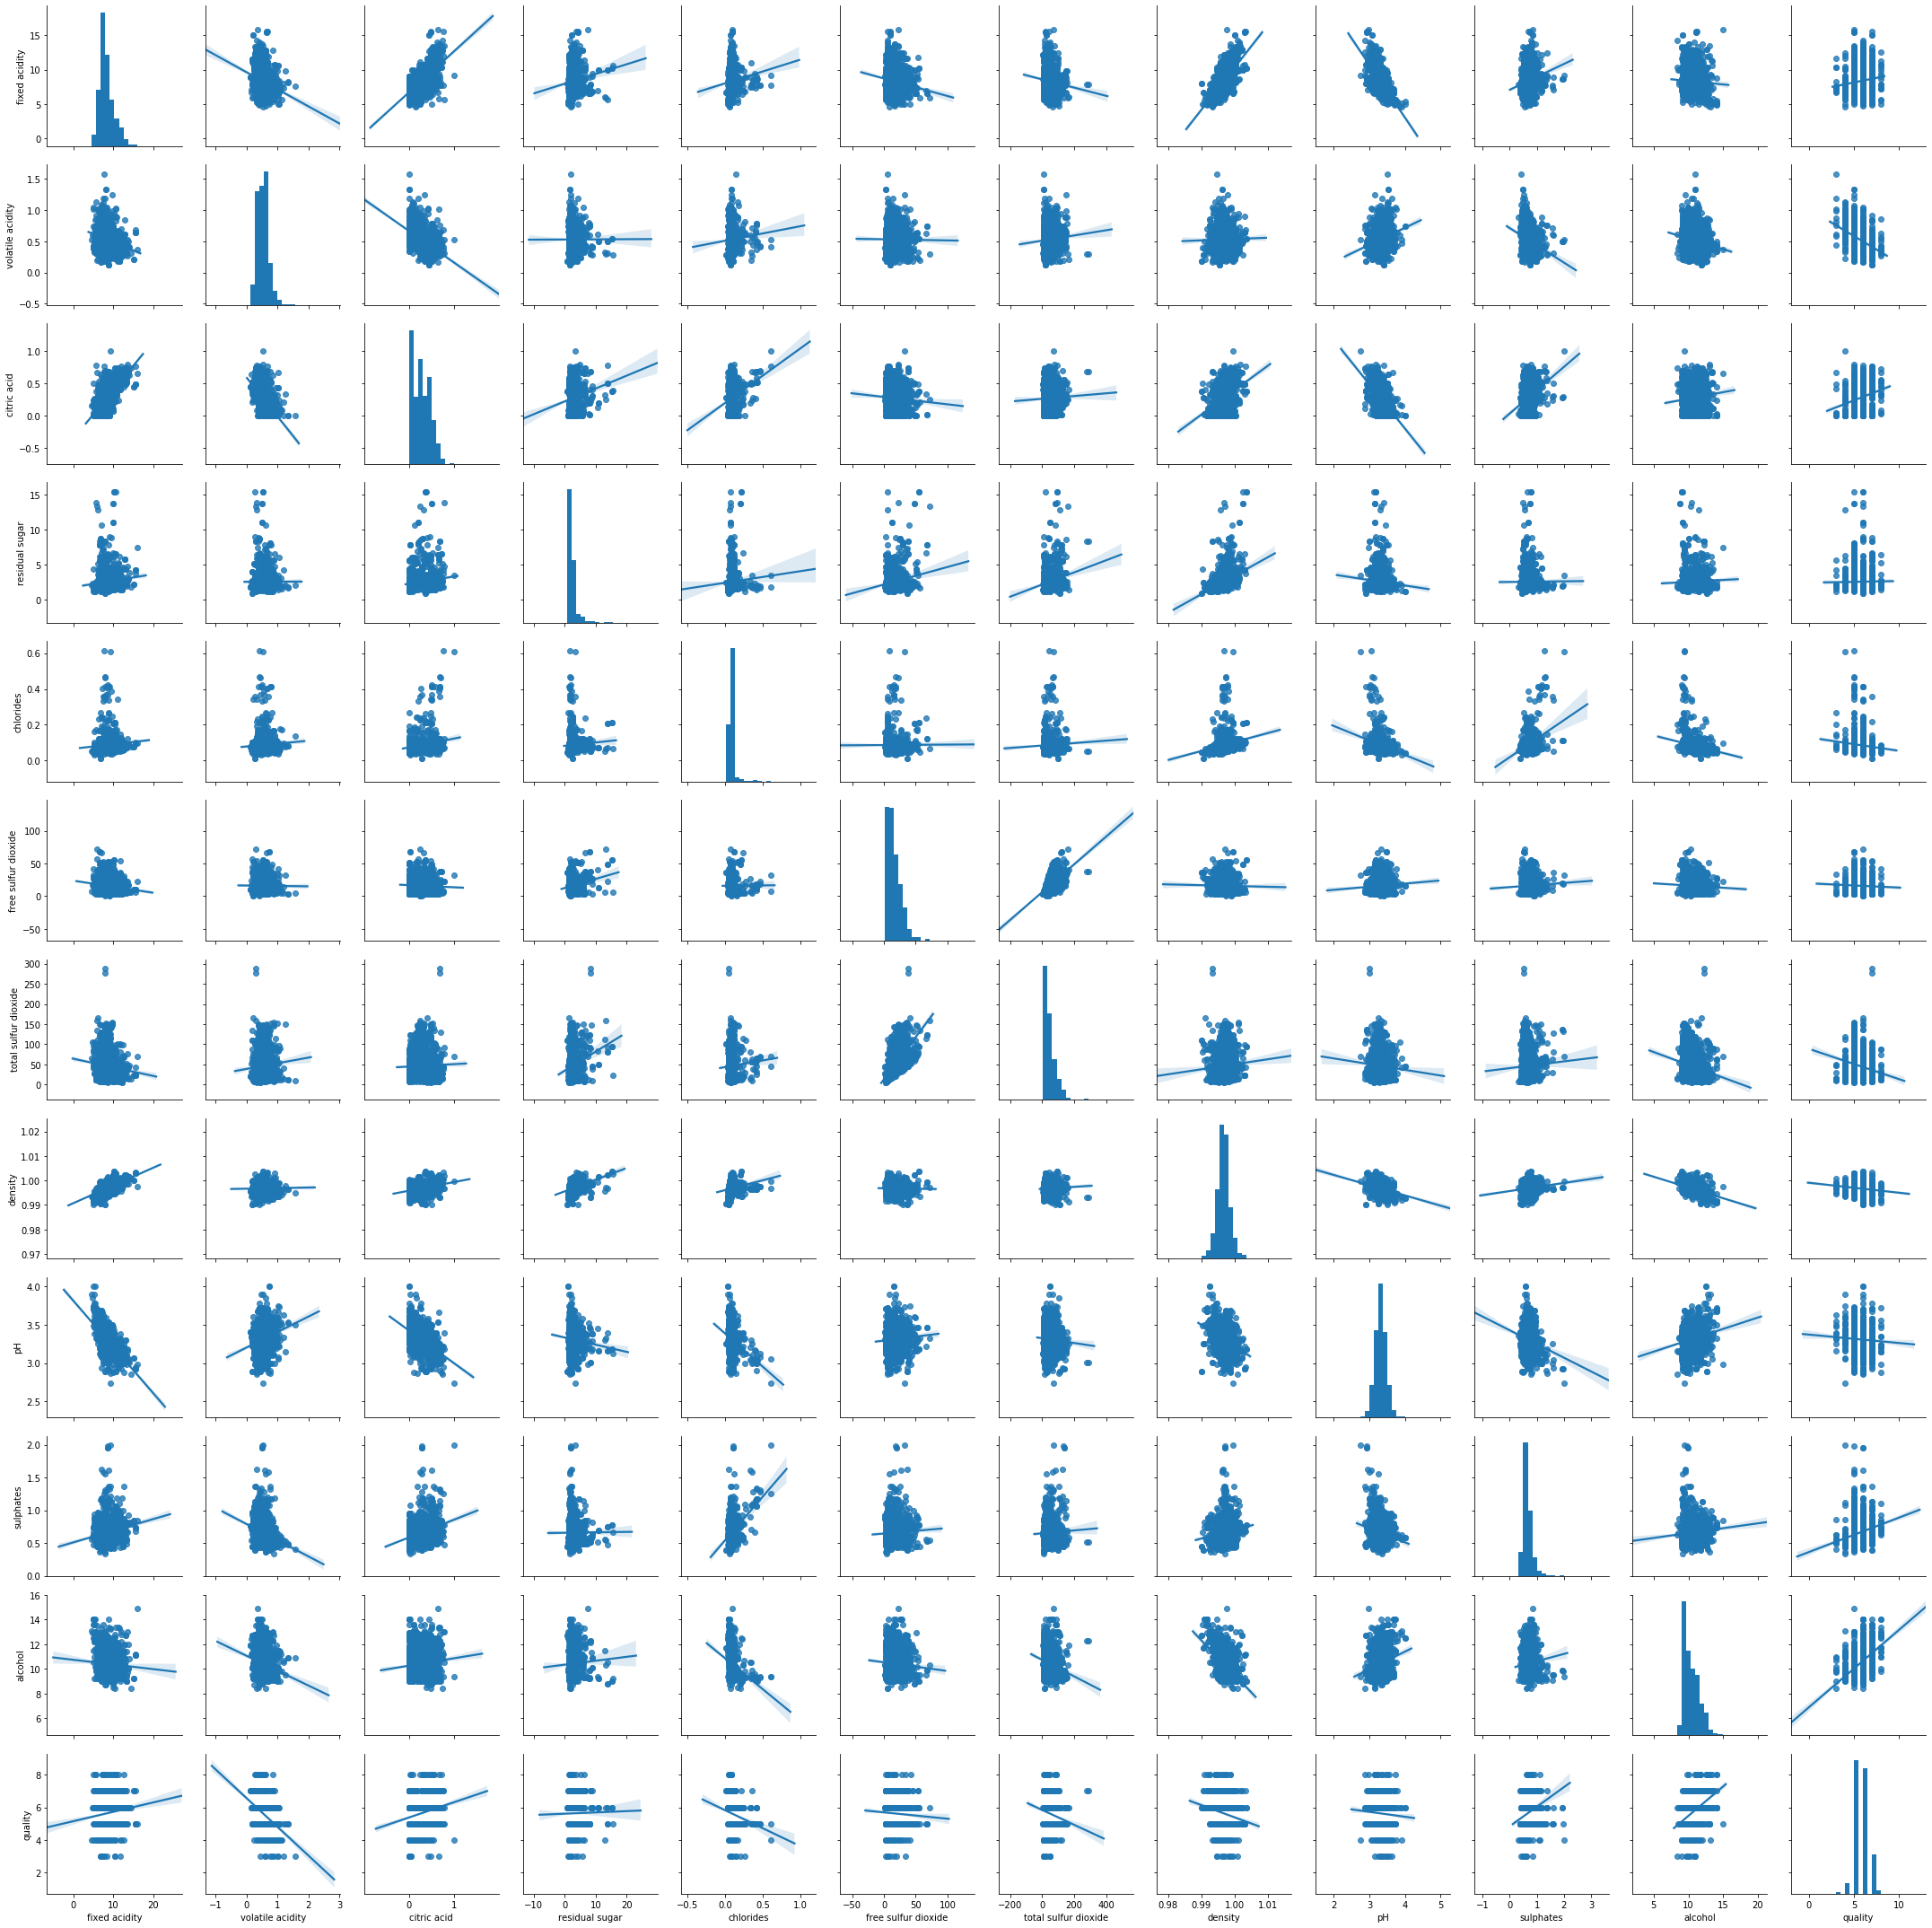

In [31]:
sns.pairplot(wine, kind='reg')

In [32]:
wine.corr()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  sulphates   alcohol   quality
fixed acidity              1.000000         -0.256131     0.671703        0.114777   0.093705            -0.153794             -0.113181  0.668047 -0.682978   0.183006 -0.061668  0.124052
volatile acidity          -0.256131          1.000000    -0.552496        0.001918   0.061298            -0.010504              0.076470  0.022026  0.234937  -0.260987 -0.202288 -0.390558
citric acid                0.671703         -0.552496     1.000000        0.143577   0.203823            -0.060978              0.035533  0.364947 -0.541904   0.312770  0.109903  0.226373
residual sugar             0.114777          0.001918     0.143577        1.000000   0.055610             0.187049              0.203028  0.355283 -0.085652   0.005527  0.042075  0.013732
chlorides                  0.093705          0.061298     0.203823        0.055610   1.000000             0.005562              0.047400  0.200632 -0.265026   0.371260 -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504    -0.060978        0.187049   0.005562             1.000000              0.667666 -0.021946  0.070377   0.051658 -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470     0.035533        0.203028   0.047400             0.667666              1.000000  0.071269 -0.066495   0.042947 -0.205654 -0.185100
density                    0.668047          0.022026     0.364947        0.355283   0.200632            -0.021946              0.071269  1.000000 -0.341699   0.148506 -0.496180 -0.174919
pH                        -0.682978          0.234937    -0.541904       -0.085652  -0.265026             0.070377             -0.066495 -0.341699  1.000000  -0.196648  0.205633 -0.057731
sulphates                  0.183006         -0.260987     0.312770        0.005527   0.371260             0.051658              0.042947  0.148506 -0.196648   1.000000  0.093595  0.251397
alcohol                   -0.061668         -0.202288     0.109903        0.042075  -0.221141            -0.069408             -0.205654 -0.496180  0.205633   0.093595  1.000000  0.476166
quality                    0.124052         -0.390558     0.226373        0.013732  -0.128907            -0.050656             -0.185100 -0.174919 -0.057731   0.251397  0.476166  1.000000

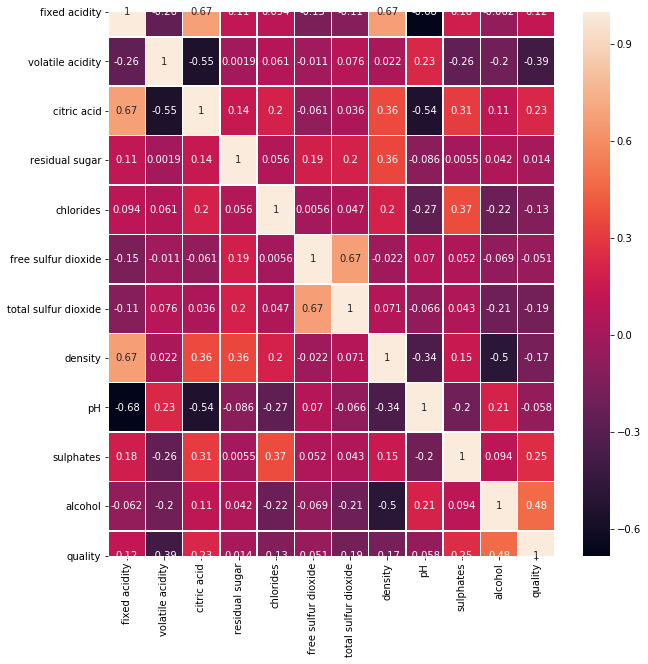

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(), annot=True, square=False, linewidths=0.5)

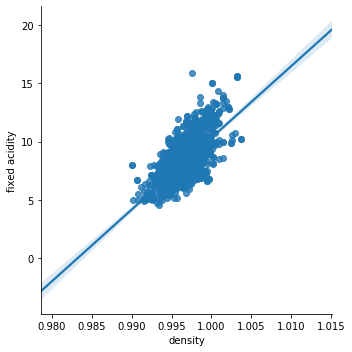

In [35]:
sns.lmplot(data=wine, x='density', y='fixed acidity')

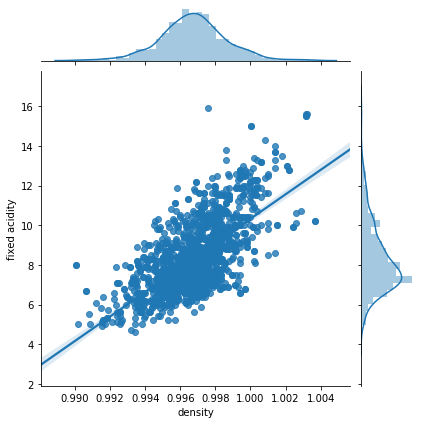

In [38]:
sns.jointplot(data=wine, x='density', y='fixed acidity', kind='reg')

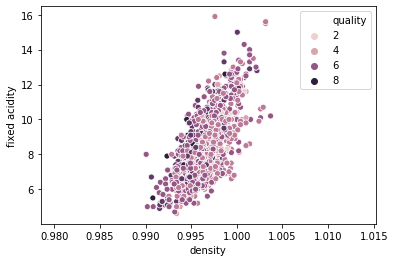

In [39]:
sns.scatterplot(data=wine, x='density', y='fixed acidity', hue='quality')

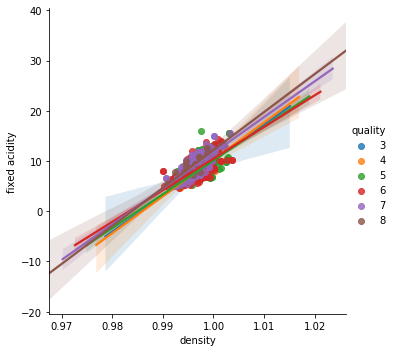

In [40]:
sns.lmplot(data=wine, x='density', y='fixed acidity', hue='quality')

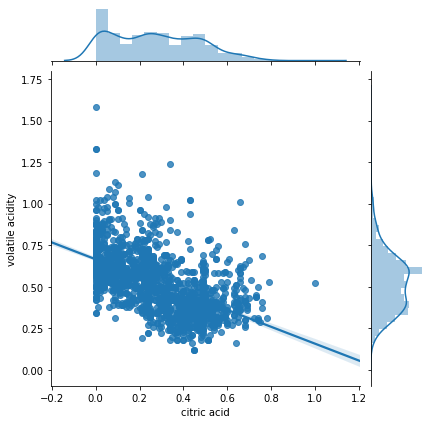

In [41]:
sns.jointplot(data=wine, x='citric acid', y='volatile acidity', kind='reg')